In [ ]:
!pip install fredapi

In [104]:
from fredapi import Fred

fred = Fred(api_key='d1b83183cf1402cdbdf068f2c28b77e4')

cpi = fred.get_series('CPIAUCSL', observation_start='2020-01-01')

pce = fred.get_series('PCEC', observation_start='2020-01-01')

cpi.to_csv('cpi_fred.csv', index=True)
pce.to_csv('pce_fred.csv', index=True)



In [105]:
gdp_df = pd.read_csv('/content/pce_fred.csv')

In [106]:
gdp_df.head()

,Unnamed: 0,0
0,2020-01-01,14496.227
1,2020-04-01,13175.637
2,2020-07-01,14478.033
3,2020-10-01,14752.732
4,2021-01-01,15259.427


In [107]:
gdp_df['DATE'] = pd.to_datetime(gdp_df['Unnamed: 0'])
gdp_df.rename(columns={'DATE': 'Date', '0': 'GDP_Billions'}, inplace=True)
gdp_df.drop(columns=['Unnamed: 0'], inplace=True)

In [108]:
gdp_df.rename(columns={'Date': 'Quarter'}, inplace=True)

In [109]:
gdp_df = gdp_df[['Quarter','GDP_Billions']]

In [110]:
gdp_df.head()


,Quarter,GDP_Billions
0,2020-01-01,14496.227
1,2020-04-01,13175.637
2,2020-07-01,14478.033
3,2020-10-01,14752.732
4,2021-01-01,15259.427


In [111]:
cpi_df = pd.read_csv('/content/cpi_fred.csv')

In [112]:
cpi_df.rename(columns={'Unnamed: 0': 'Quarter', '0': 'CPI'}, inplace=True)

In [113]:
cpi_df.head()

,Quarter,CPI
0,2020-01-01,259.127
1,2020-02-01,259.250
2,2020-03-01,258.076
3,2020-04-01,256.032
4,2020-05-01,255.802


In [114]:
import pandas as pd

cpi_df['Quarter'] = pd.to_datetime(cpi_df['Quarter'])
cpi_df.set_index('Quarter', inplace=True)

quarterly_df = cpi_df.resample('Q').mean()

quarterly_df.reset_index(inplace=True)

quarterly_df['Quarter'] = quarterly_df['Quarter'].dt.to_period('Q').dt.start_time
quarterly_df = quarterly_df.iloc[:-1]

cpi_df = quarterly_df
print(cpi_df)


      Quarter         CPI
0  2020-01-01  258.817667
1  2020-04-01  256.292000
2  2020-07-01  259.221667
3  2020-10-01  261.091667
4  2021-01-01  263.686333
5  2021-04-01  268.579667
6  2021-07-01  272.886333
7  2021-10-01  278.719333
8  2022-01-01  284.844667
9  2022-04-01  291.651000
10 2022-07-01  295.507667
11 2022-10-01  298.498333
12 2023-01-01  301.191667
13 2023-04-01  303.424333
14 2023-07-01  306.042333
15 2023-10-01  308.158333
16 2024-01-01  310.974333
17 2024-04-01  313.095667
18 2024-07-01  314.182667
19 2024-10-01  316.538667


<ipython-input-114-f28a063fa525>:6: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



In [115]:
import requests
import pandas as pd

api_key = 'E8121B57-DD94-48D7-AA94-857B9A3E6474'

url = 'https://apps.bea.gov/api/data/'
params = {
    'UserID': api_key,
    'method': 'GetData',
    'datasetname': 'NIPA',
    'TableName': 'T20305',
    'Frequency': 'Q',
    'Year': '2020,2021,2022,2023,2024',
    'ResultFormat': 'json'
}

response = requests.get(url, params=params)
data = response.json()

df = pd.DataFrame(data['BEAAPI']['Results']['Data'])

pce_df = df[df['LineNumber'] == '1'][['TimePeriod', 'DataValue']]
pce_df.rename(columns={'TimePeriod': 'Year', 'DataValue': 'PCE'}, inplace=True)

pce_df['PCE'] = pce_df['PCE'].str.replace(',', '').astype(float)

pce_df.to_csv('pce_bae.csv', index=False)

pce_df


,Year,PCE
0,2020Q1,14496227.0
1,2020Q2,13175637.0
2,2020Q3,14478033.0
3,2020Q4,14752732.0
4,2021Q1,15259427.0
5,2021Q2,16016346.0
6,2021Q3,16363876.0
7,2021Q4,16816132.0
8,2022Q1,17175105.0
9,2022Q2,17603753.0


In [116]:
spending_df = pd.read_csv('/content/pce_bae.csv')

In [117]:
spending_df

,Year,PCE
0,2020Q1,14496227.0
1,2020Q2,13175637.0
2,2020Q3,14478033.0
3,2020Q4,14752732.0
4,2021Q1,15259427.0
5,2021Q2,16016346.0
6,2021Q3,16363876.0
7,2021Q4,16816132.0
8,2022Q1,17175105.0
9,2022Q2,17603753.0


In [118]:
spending_df.rename(columns={'Year': 'Quarter'}, inplace=True)

In [119]:
spending_df.head()

,Quarter,PCE
0,2020Q1,14496227.0
1,2020Q2,13175637.0
2,2020Q3,14478033.0
3,2020Q4,14752732.0
4,2021Q1,15259427.0


In [120]:
spending_df['Quarter'] = pd.to_datetime(spending_df['Quarter'].str.replace('Q', 'Q', regex=False))

<ipython-input-120-b7352f81e916>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [121]:
spending_df.head()

,Quarter,PCE
0,2020-01-01,14496227.0
1,2020-04-01,13175637.0
2,2020-07-01,14478033.0
3,2020-10-01,14752732.0
4,2021-01-01,15259427.0


In [122]:
unemployment_df = pd.read_csv('/content/CPI_BLS.csv')

In [123]:
unemployment_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2020,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474
1,2021,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802
2,2022,281.148,283.716,287.504,289.109,292.296,296.311,296.276,296.171,296.808,298.012,297.711,296.797
3,2023,299.170,300.840,301.836,303.363,304.127,305.109,305.691,307.026,307.789,307.671,307.051,306.746
4,2024,308.417,310.326,312.332,313.548,314.069,314.175,314.540,314.796,315.301,315.664,315.493,315.605


In [124]:
import pandas as pd

df = pd.read_csv('/content/CPI_BLS.csv')

quarters = {
    'Q1': ['Jan', 'Feb', 'Mar'],
    'Q2': ['Apr', 'May', 'Jun'],
    'Q3': ['Jul', 'Aug', 'Sep'],
    'Q4': ['Oct', 'Nov', 'Dec']
}

quarterly_data = pd.DataFrame()
quarterly_data['Year'] = df['Year']

for q, months in quarters.items():
    quarterly_data[q] = df[months].mean(axis=1)

quarterly_long = quarterly_data.melt(id_vars='Year', var_name='Quarter', value_name='CPI')

quarterly_long['Date'] = quarterly_long['Year'].astype(str) + '-' + quarterly_long['Quarter']
quarterly_long.drop(['Year', 'Quarter'], axis=1, inplace=True)

quarterly_long['Date'] = pd.PeriodIndex(quarterly_long['Date'], freq='Q').to_timestamp()

quarterly_long = quarterly_long[['Date', 'CPI']]
quarterly_long = quarterly_long.dropna()

quarterly_long = quarterly_long.sort_values('Date').reset_index(drop=True)
quarterly_long.head()


quarterly_long.to_csv('cpi_bls.csv', index=False)


In [125]:
unemployment_df = pd.read_csv('/content/cpi_bls.csv')

In [126]:
unemployment_df.head()

,Date,CPI
0,2020-01-01,258.254667
1,2020-04-01,256.860000
2,2020-07-01,259.766333
3,2020-10-01,260.363667
4,2021-01-01,263.157667


In [127]:
unemployment_df.rename(columns={'Date': 'Quarter'}, inplace=True)

In [128]:
unemployment_df.rename(columns={'CPI': 'CPI_U'}, inplace=True)


In [129]:
unemployment_df.head()

,Quarter,CPI_U
0,2020-01-01,258.254667
1,2020-04-01,256.860000
2,2020-07-01,259.766333
3,2020-10-01,260.363667
4,2021-01-01,263.157667


In [130]:
cpi_df['Quarter'] = pd.to_datetime(cpi_df['Quarter'])
gdp_df['Quarter'] = pd.to_datetime(gdp_df['Quarter'])
spending_df['Quarter'] = pd.to_datetime(spending_df['Quarter'])
unemployment_df['Quarter'] = pd.to_datetime(unemployment_df['Quarter'])

analysis_df = pd.merge(cpi_df, gdp_df, on='Quarter', how='inner')
analysis_df = pd.merge(analysis_df, spending_df, on='Quarter', how='inner')
analysis_df = pd.merge(analysis_df, unemployment_df, on='Quarter', how='inner')

In [131]:
analysis_df

,Quarter,CPI,GDP_Billions,PCE,CPI_U
0,2020-01-01,258.817667,14496.227,14496227.0,258.254667
1,2020-04-01,256.292000,13175.637,13175637.0,256.860000
2,2020-07-01,259.221667,14478.033,14478033.0,259.766333
3,2020-10-01,261.091667,14752.732,14752732.0,260.363667
4,2021-01-01,263.686333,15259.427,15259427.0,263.157667
5,2021-04-01,268.579667,16016.346,16016346.0,269.315000
6,2021-07-01,272.886333,16363.876,16363876.0,273.626667
7,2021-10-01,278.719333,16816.132,16816132.0,277.779667
8,2022-01-01,284.844667,17175.105,17175105.0,284.122667
9,2022-04-01,291.651000,17603.753,17603753.0,292.572000


In [132]:
import pandas as pd
from sqlalchemy import create_engine, text


In [133]:
engine = create_engine('sqlite:///my_personal_database.db', echo=False)

In [134]:
cpi_df.to_sql('cpi', engine, if_exists='replace', index=False)
gdp_df.to_sql('gdp', engine, if_exists='replace', index=False)
spending_df.to_sql('spending', engine, if_exists='replace', index=False)
unemployment_df.to_sql('unemployment', engine, if_exists='replace', index=False)


20

In [135]:
query = """
SELECT
    cpi.Quarter,
    cpi.CPI,
    gdp.GDP_Billions,
    spending.PCE,
    unemployment.CPI_U
FROM cpi
JOIN gdp ON cpi.Quarter = gdp.Quarter
JOIN spending ON cpi.Quarter = spending.Quarter
JOIN unemployment ON cpi.Quarter = unemployment.Quarter
"""

final_df = pd.read_sql_query(text(query), con=engine)


In [136]:
final_df

,Quarter,CPI,GDP_Billions,PCE,CPI_U
0,2020-01-01 00:00:00.000000,258.817667,14496.227,14496227.0,258.254667
1,2020-04-01 00:00:00.000000,256.292000,13175.637,13175637.0,256.860000
2,2020-07-01 00:00:00.000000,259.221667,14478.033,14478033.0,259.766333
3,2020-10-01 00:00:00.000000,261.091667,14752.732,14752732.0,260.363667
4,2021-01-01 00:00:00.000000,263.686333,15259.427,15259427.0,263.157667
5,2021-04-01 00:00:00.000000,268.579667,16016.346,16016346.0,269.315000
6,2021-07-01 00:00:00.000000,272.886333,16363.876,16363876.0,273.626667
7,2021-10-01 00:00:00.000000,278.719333,16816.132,16816132.0,277.779667
8,2022-01-01 00:00:00.000000,284.844667,17175.105,17175105.0,284.122667
9,2022-04-01 00:00:00.000000,291.651000,17603.753,17603753.0,292.572000


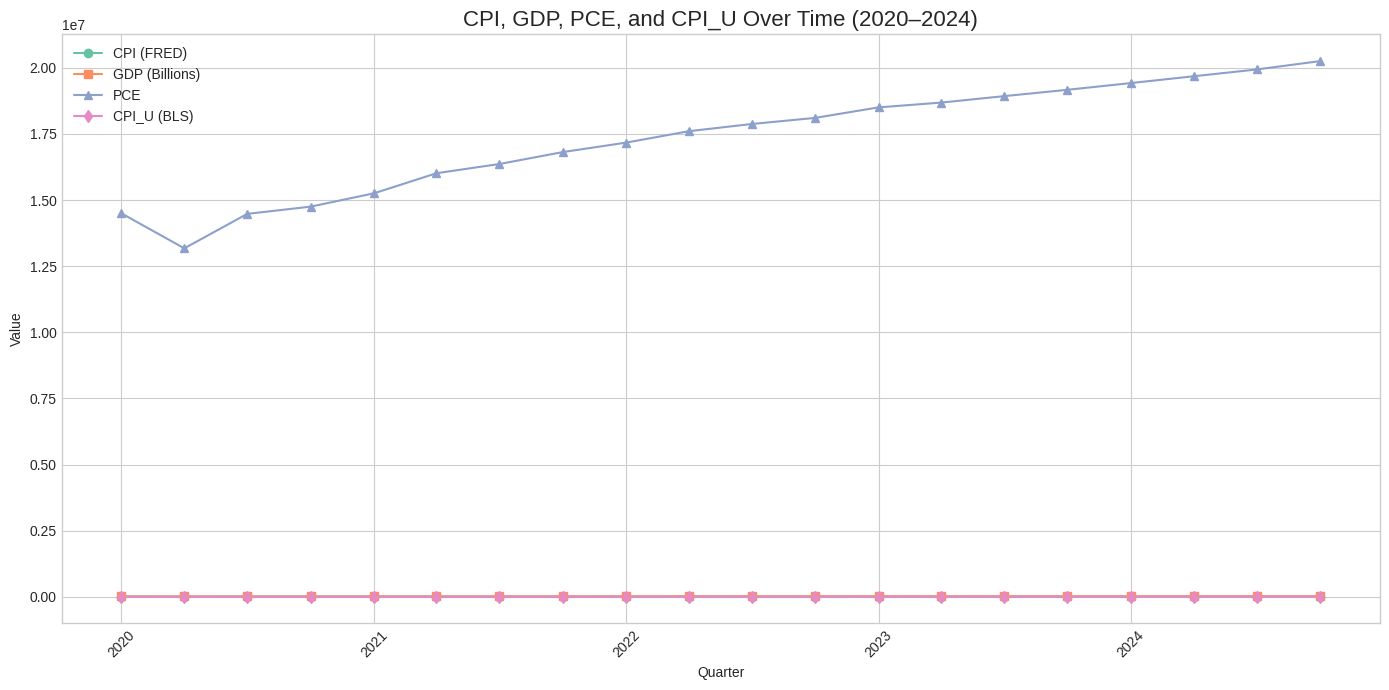

In [137]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))

plt.plot(analysis_df['Quarter'], analysis_df['CPI'], label='CPI (FRED)', marker='o')
plt.plot(analysis_df['Quarter'], analysis_df['GDP_Billions'], label='GDP (Billions)', marker='s')
plt.plot(analysis_df['Quarter'], analysis_df['PCE'], label='PCE', marker='^')
plt.plot(analysis_df['Quarter'], analysis_df['CPI_U'], label='CPI_U (BLS)', marker='d')

plt.title('CPI, GDP, PCE, and CPI_U Over Time (2020–2024)', fontsize=16)
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [139]:
df = analysis_df.copy()

In [140]:
df['GDP_Growth_Rate'] = df['GDP_Billions'].pct_change() * 100

In [141]:
df['CPI_Inflation_Rate'] = df['CPI'].pct_change() * 100

df['Quarter_Label'] = df['Quarter'].dt.strftime('Q%q %Y')
df['Quarter_Num'] = df['Quarter'].dt.quarter
df['Year'] = df['Quarter'].dt.year

def format_x_axis(ax, rotation=45):
    plt.xticks(rotation=rotation, ha='right')
    ax.xaxis.grid(True, linestyle='--', alpha=0.7)
    return ax

<Figure size 1400x800 with 0 Axes>

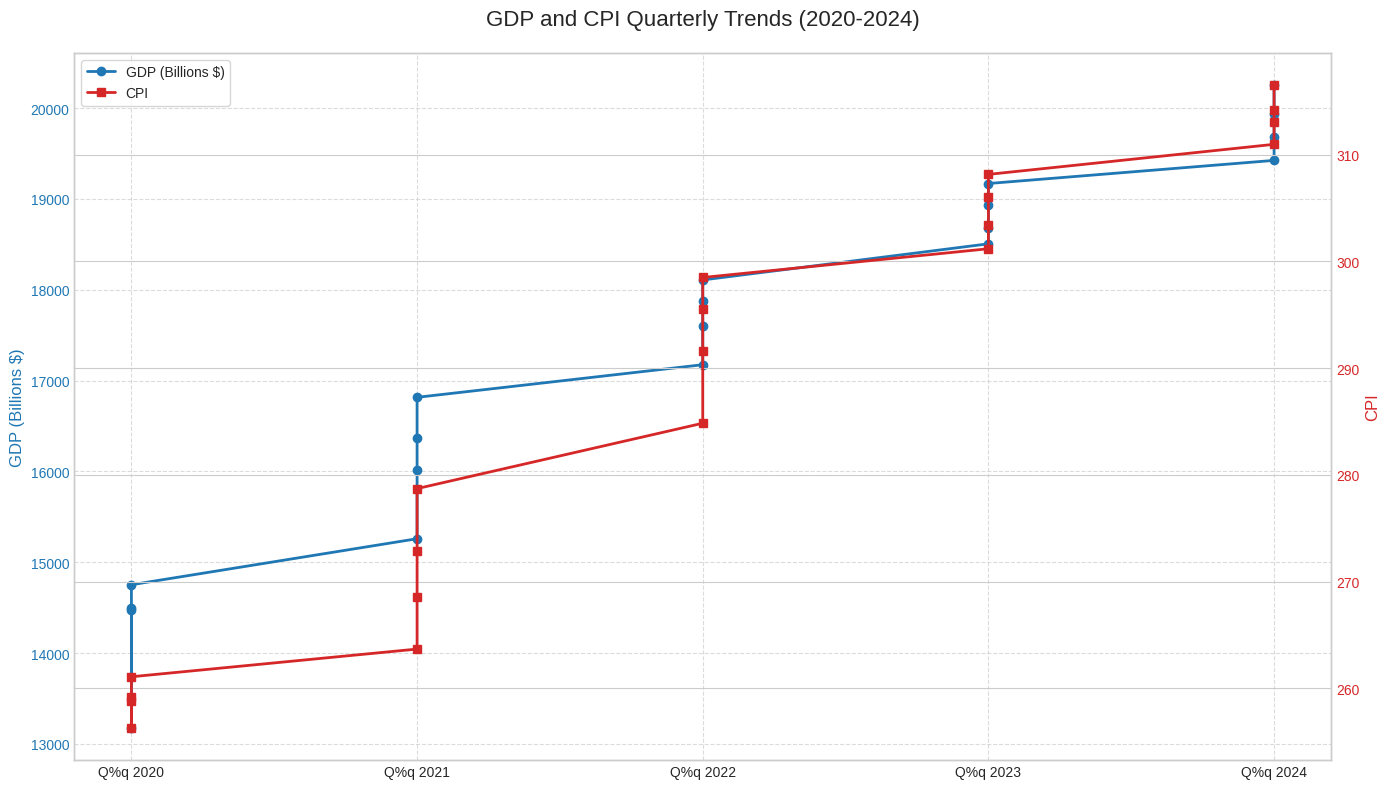

In [142]:
plt.figure(figsize=(14, 8))
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:blue'
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('GDP (Billions $)', color=color, fontsize=12)
ax1.plot(df['Quarter_Label'], df['GDP_Billions'], color=color, marker='o', linewidth=2, label='GDP (Billions $)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('CPI', color=color, fontsize=12)
ax2.plot(df['Quarter_Label'], df['CPI'], color=color, marker='s', linewidth=2, label='CPI')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('GDP and CPI Quarterly Trends (2020-2024)', fontsize=16, pad=20)
ax1.grid(True, linestyle='--', alpha=0.7)
format_x_axis(ax1)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)

plt.tight_layout()
plt.savefig('gdp_cpi_quarterly_trends.png')
plt.show()


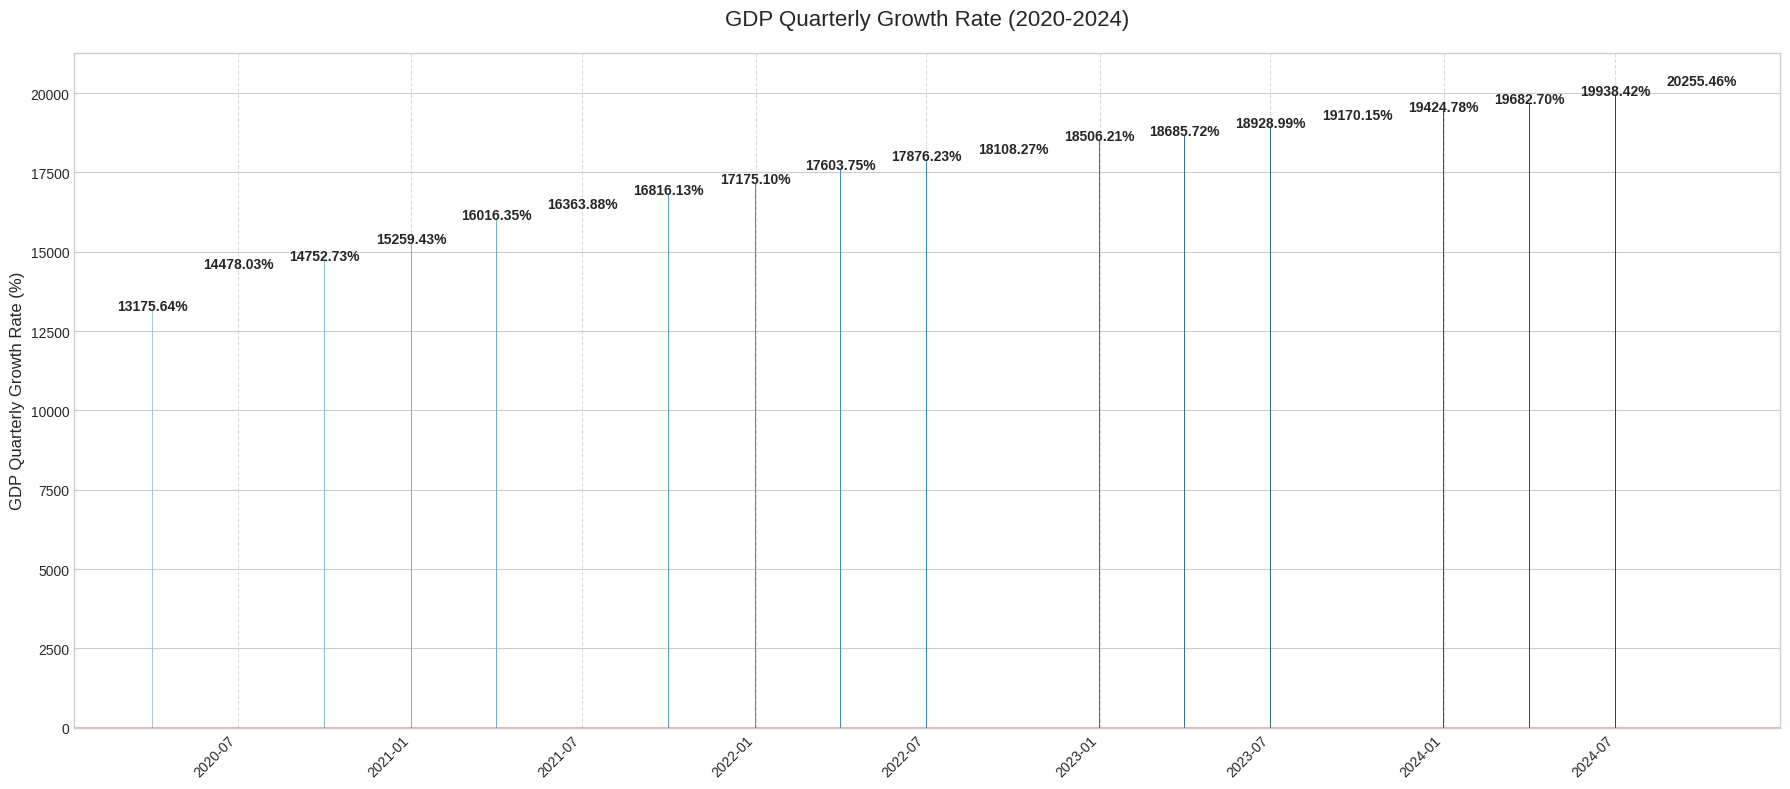

In [143]:
plt.figure(figsize=(18, 8))
ax = plt.gca()
bars = plt.bar(df['Quarter'][1:], df['GDP_Billions'][1:], color=sns.color_palette("Blues_d", len(df)-1))

plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)

plt.xlabel('')
plt.ylabel('GDP Quarterly Growth Rate (%)', fontsize=12)
plt.title('GDP Quarterly Growth Rate (2020-2024)', fontsize=16, pad=20)

format_x_axis(ax)

for i, bar in enumerate(bars):
    height = bar.get_height()
    if abs(height) > 2:
        plt.text(bar.get_x() + bar.get_width()/2, height + (0.5 if height > 0 else -1.5),
                f'{height:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('gdp_quarterly_growth.png')
plt.show()

In [144]:
import plotly.graph_objects as go
import pandas as pd

df = analysis_df.copy()
df['Quarter'] = pd.to_datetime(df['Quarter'])

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Quarter'], y=df['CPI'],
                         mode='lines+markers', name='CPI'))
fig.add_trace(go.Scatter(x=df['Quarter'], y=df['CPI_U'],
                         mode='lines+markers', name='CPI_U'))
fig.add_trace(go.Scatter(x=df['Quarter'], y=df['GDP_Billions'],
                         mode='lines+markers', name='GDP (Billions)'))
fig.add_trace(go.Scatter(x=df['Quarter'], y=df['PCE'],
                         mode='lines+markers', name='PCE'))

fig.update_layout(
    title='Economic Indicators Over Time',
    xaxis_title='Quarter',
    yaxis_title='Value',
    updatemenus=[
        dict(
            buttons=list([
                dict(label="CPI",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"yaxis": {"title": "CPI"}}]),
                dict(label="CPI_U",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"yaxis": {"title": "CPI_U"}}]),
                dict(label="GDP (Billions)",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"yaxis": {"title": "GDP (Billions)"}}]),
                dict(label="PCE",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"yaxis": {"title": "PCE"}}]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"yaxis": {"title": "Value"}}]),
            ]),
            direction="down",
        )
    ]
)

fig.show()


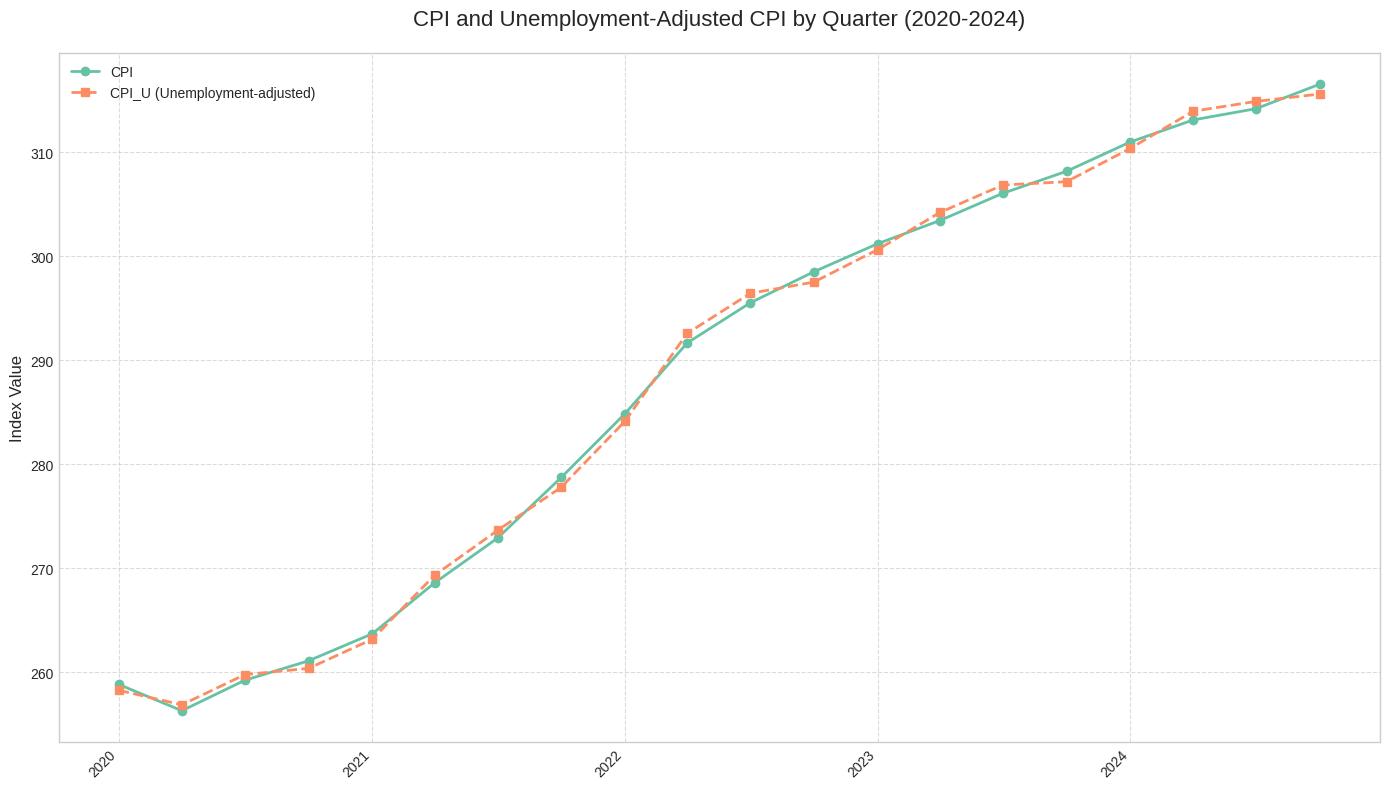

In [159]:
plt.figure(figsize=(14, 8))
plt.plot(df['Quarter'], df['CPI'], marker='o', linewidth=2, label='CPI')
plt.plot(df['Quarter'], df['CPI_U'], marker='s', linewidth=2, linestyle='--', label='CPI_U (Unemployment-adjusted)')

plt.xlabel('')
plt.ylabel('Index Value', fontsize=12)
plt.title('CPI and Unemployment-Adjusted CPI by Quarter (2020-2024)', fontsize=16, pad=20)

format_x_axis(plt.gca())

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig('cpi_quarterly_trends.png')
plt.show()

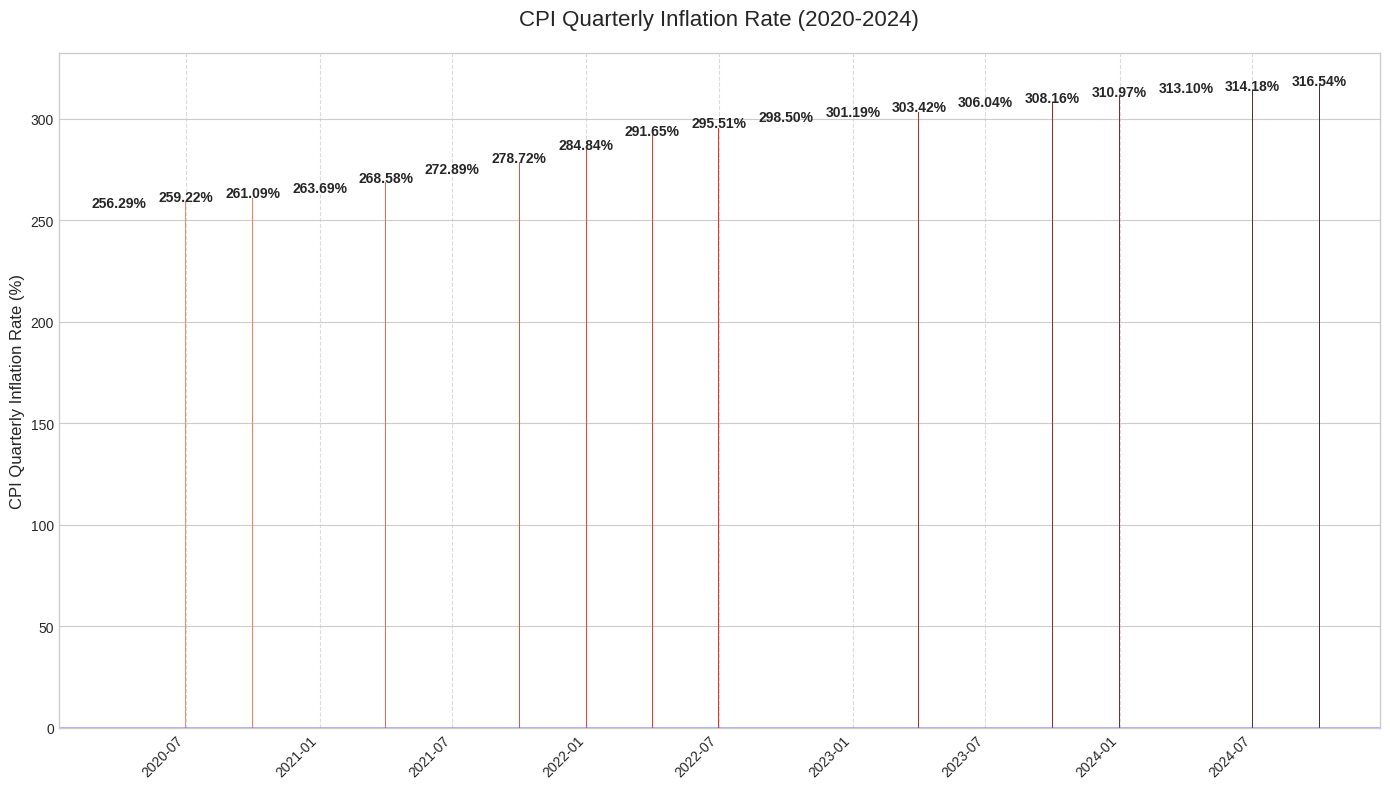

In [146]:
plt.figure(figsize=(14, 8))
ax = plt.gca()
bars = plt.bar(df['Quarter'][1:], df['CPI'][1:], color=sns.color_palette("Reds_d", len(df)-1))

plt.axhline(y=0, color='blue', linestyle='-', alpha=0.3)

plt.xlabel('')
plt.ylabel('CPI Quarterly Inflation Rate (%)', fontsize=12)
plt.title('CPI Quarterly Inflation Rate (2020-2024)', fontsize=16, pad=20)

format_x_axis(ax)

# Annotate bars with values
for i, bar in enumerate(bars):
    height = bar.get_height()
    if abs(height) > 0.5:
        plt.text(bar.get_x() + bar.get_width()/2, height + (0.1 if height > 0 else -0.3),
                f'{height:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('cpi_quarterly_inflation.png')
plt.show()


<Figure size 1400x1000 with 0 Axes>

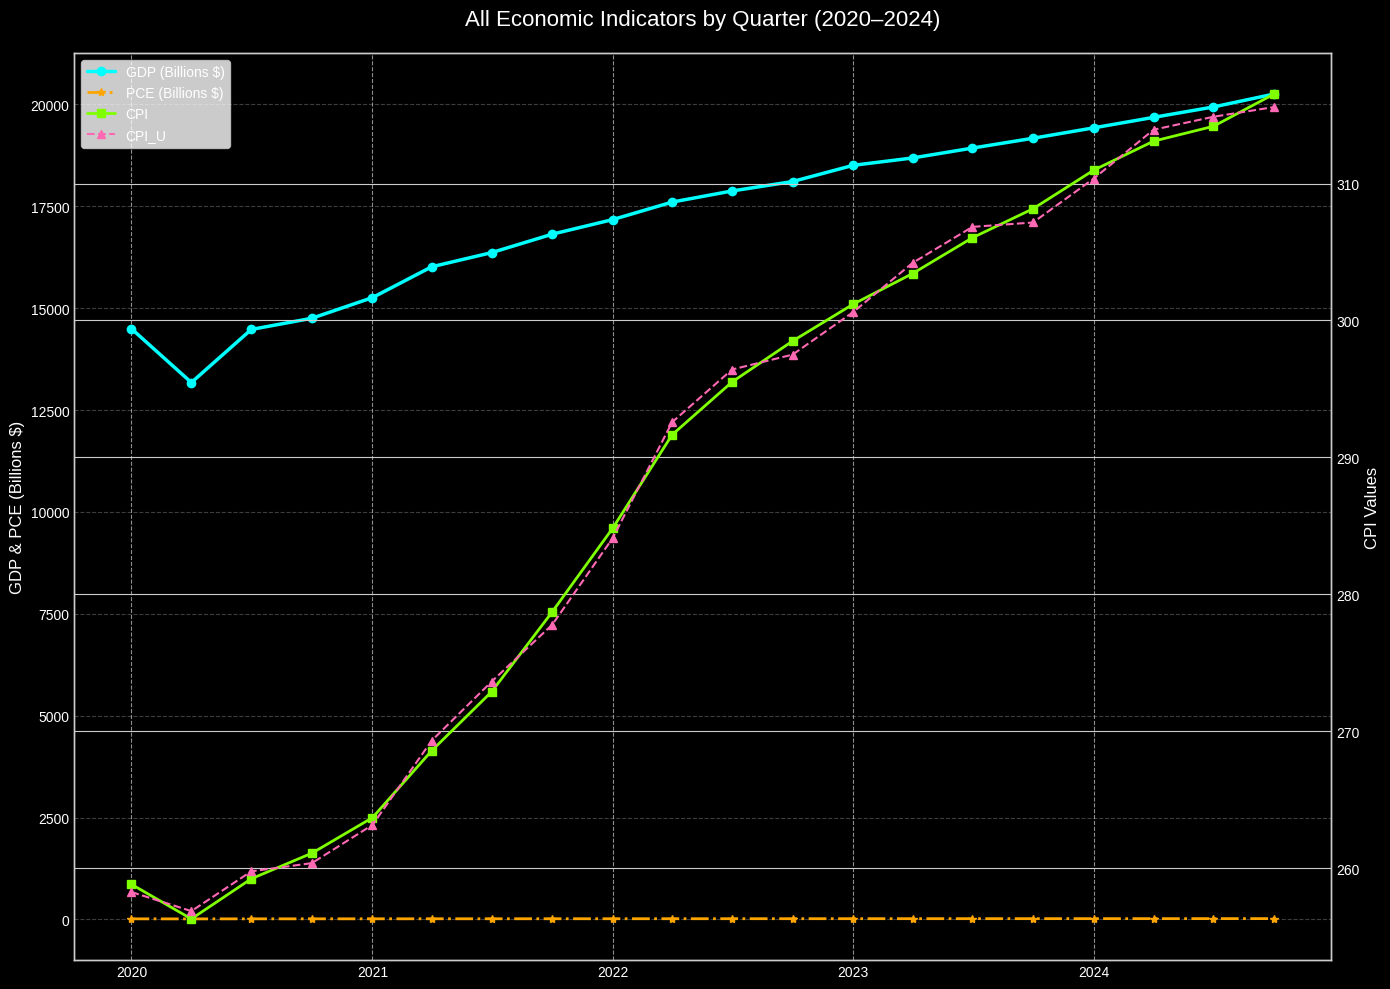

In [157]:
plt.figure(figsize=(14, 10))
fig, ax1 = plt.subplots(figsize=(14, 10))

fig.patch.set_facecolor('black')
ax1.set_facecolor('black')

gdp_color = '#00FFFF'
pce_color = '#FFA500'
cpi_color = '#7FFF00'
cpi_u_color = '#FF69B4'
text_color = 'white'

# Primary y-axis (GDP & PCE)
ax1.set_xlabel('', fontsize=12, color=text_color)
ax1.set_ylabel('GDP & PCE (Billions $)', color=text_color, fontsize=12)
ax1.plot(df['Quarter'], df['GDP_Billions'], color=gdp_color, marker='o', linewidth=2.5, label='GDP (Billions $)')
ax1.plot(df['Quarter'], df['PCE'] / 1000000, color=pce_color, marker='*', linewidth=2, linestyle='-.', label='PCE (Billions $)')
ax1.tick_params(axis='y', labelcolor=text_color)
ax1.tick_params(axis='x', labelcolor=text_color)

# Secondary y-axis (CPI & CPI_U)
ax2 = ax1.twinx()
ax2.set_ylabel('CPI Values', color=text_color, fontsize=12)
ax2.plot(df['Quarter'], df['CPI'], color=cpi_color, marker='s', linewidth=2, label='CPI')
ax2.plot(df['Quarter'], df['CPI_U'], color=cpi_u_color, marker='^', linestyle='--', linewidth=1.5, label='CPI_U')
ax2.tick_params(axis='y', labelcolor=text_color)

plt.title('All Economic Indicators by Quarter (2020–2024)', fontsize=16, pad=20, color=text_color)

ax1.grid(True, linestyle='--', alpha=0.3)

format_x_axis(ax1)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
legend = ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True)
for text in legend.get_texts():
    text.set_color(text_color)

plt.tight_layout()
plt.savefig('all_indicators_quarterly_black.png', facecolor=fig.get_facecolor())
plt.show()


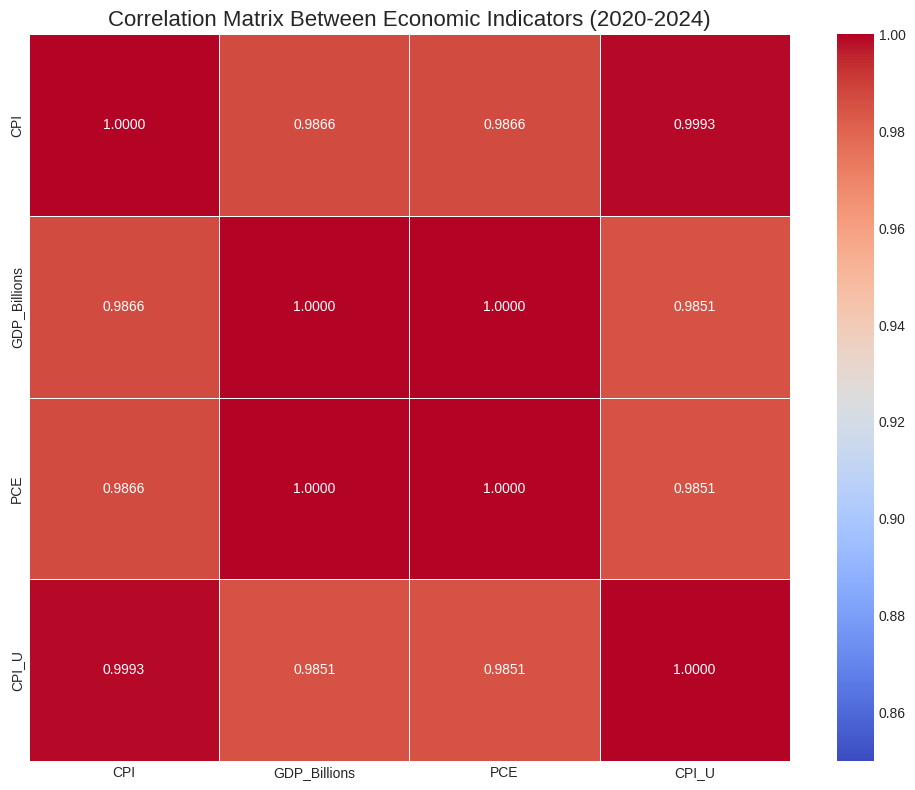

In [148]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['CPI', 'GDP_Billions', 'PCE', 'CPI_U']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0.85, vmax=1, linewidths=0.5, fmt='.4f')
plt.title('Correlation Matrix Between Economic Indicators (2020-2024)', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

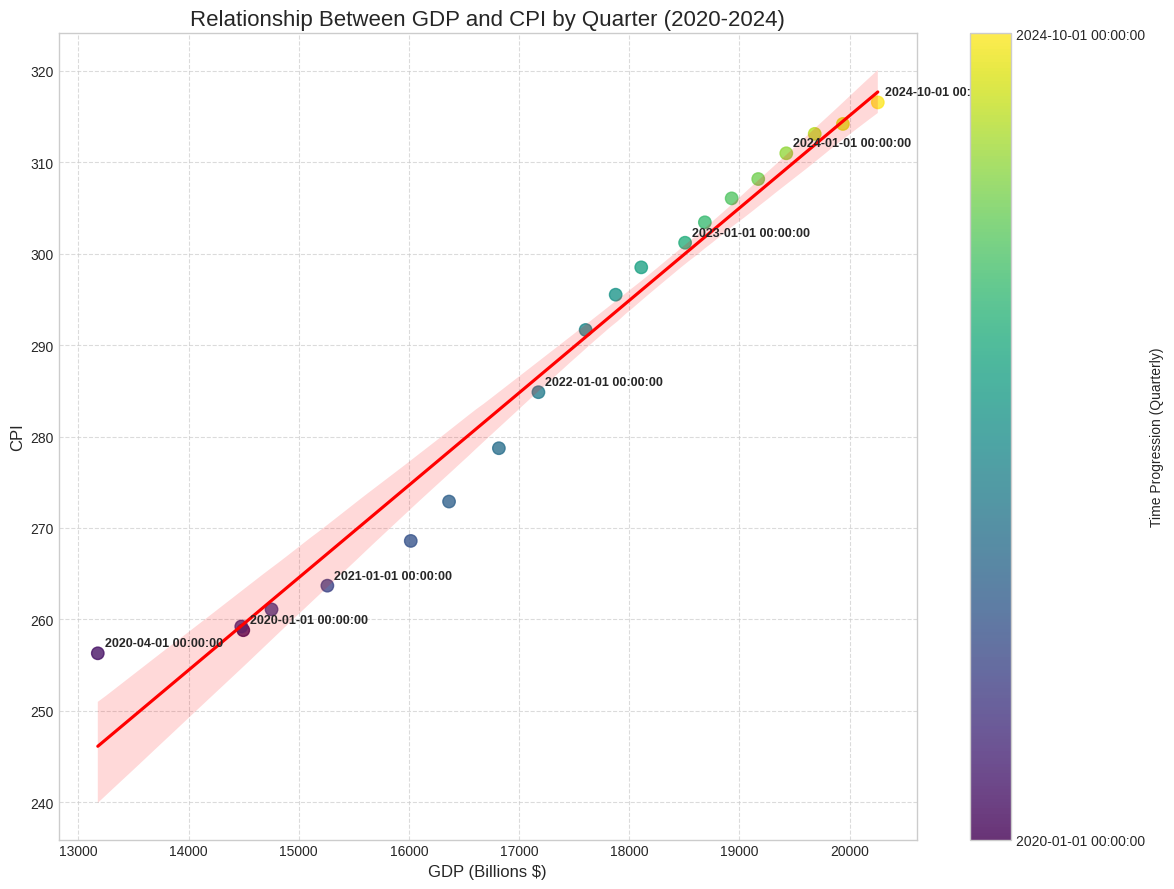

In [156]:
plt.figure(figsize=(12, 9))
scatter = plt.scatter(df['GDP_Billions'], df['CPI'], c=np.arange(len(df)), cmap='viridis',
                    s=80, alpha=0.8)

# regression line
sns.regplot(x='GDP_Billions', y='CPI', data=df, scatter=False, color='red')

# labels to specific points of interest
quarters_to_label = [0, 1, 4, 8, 12, 16, 19]
for i in quarters_to_label:
    plt.annotate(df['Quarter'][i],
                (df['GDP_Billions'][i], df['CPI'][i]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold')

cbar = plt.colorbar(scatter, label='Time Progression (Quarterly)')
cbar.set_ticks([0, len(df)-1])
cbar.set_ticklabels([df['Quarter'].iloc[0], df['Quarter'].iloc[-1]])

plt.title('Relationship Between GDP and CPI by Quarter (2020-2024)', fontsize=16)
plt.xlabel('GDP (Billions $)', fontsize=12)
plt.ylabel('CPI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('gdp_cpi_scatter_quarterly.png')
plt.show()


Hypothesis 1: CPI vs GDP
Correlation: 0.987, p-value: 0.000
=> Significant 

Hypothesis 2: CPI vs CPI_U
T-statistic: 0.028, p-value: 0.978
=> No significant difference 

Hypothesis 3: PCE vs GDP
Correlation: 1.000, p-value: 0.000
=> Strong linear relationship


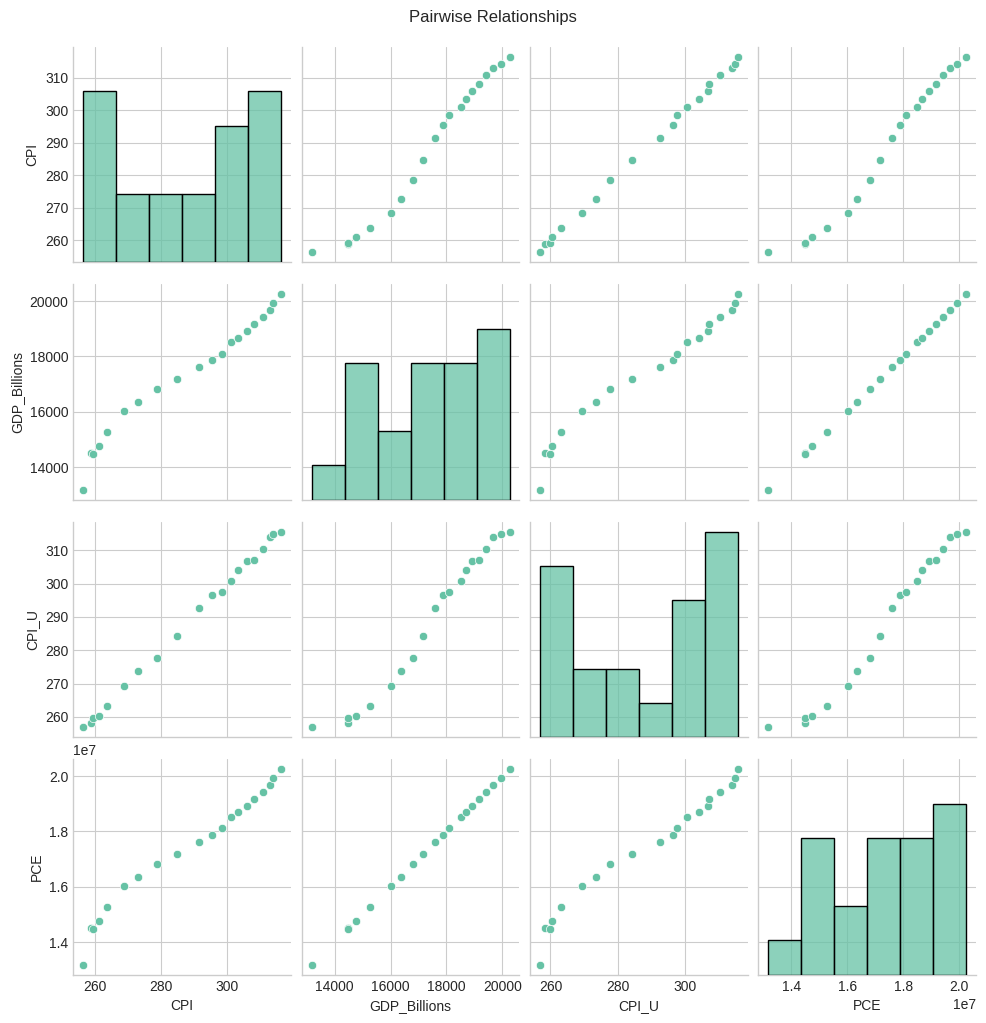

In [150]:
import pandas as pd
from scipy.stats import pearsonr, ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns

df = analysis_df.copy()

# Hypothesis 1: CPI vs GDP correlation ---
corr_cpi_gdp, p_value1 = pearsonr(df['CPI'], df['GDP_Billions'])

# Hypothesis 2: CPI vs CPI_U (paired t-test) ---
t_stat2, p_value2 = ttest_rel(df['CPI'], df['CPI_U'])

# Hypothesis 3: PCE vs GDP correlation ---
corr_pce_gdp, p_value3 = pearsonr(df['PCE'], df['GDP_Billions'])

print("Hypothesis 1: CPI vs GDP")
print(f"Correlation: {corr_cpi_gdp:.3f}, p-value: {p_value1:.3f}")
print("=> Significant" if p_value1 < 0.05 else "=> Not significant", "\n")

print("Hypothesis 2: CPI vs CPI_U")
print(f"T-statistic: {t_stat2:.3f}, p-value: {p_value2:.3f}")
print("=> Significant difference" if p_value2 < 0.05 else "=> No significant difference", "\n")

print("Hypothesis 3: PCE vs GDP")
print(f"Correlation: {corr_pce_gdp:.3f}, p-value: {p_value3:.3f}")
print("=> Strong linear relationship" if p_value3 < 0.05 else "=> Weak/no relationship")

sns.pairplot(df[['CPI', 'GDP_Billions', 'CPI_U', 'PCE']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


Hypothesis Test Results Summary

✅ Hypothesis 1: CPI vs GDP.   
Correlation: 0.987

p-value: 0.000.   
📌 Interpretation:     
There is a very strong positive correlation between inflation (CPI) and GDP.
As CPI rises, GDP also increases — likely due to economic growth accompanied by price increases.

❌ Hypothesis 2: CPI vs CPI_U.  
T-statistic: 0.028

p-value: 0.978.   
📌 Interpretation:    
No statistically significant difference between CPI and CPI_U.
Urban CPI (CPI_U) closely mirrors the overall CPI, suggesting urban and overall inflation trends are almost identical during this period.

✅ Hypothesis 3: PCE vs GDP.   
Correlation: 1.000

p-value: 0.000.    
📌 Interpretation:   
A perfect positive correlation between Personal Consumption Expenditure (PCE) and GDP.
This confirms that consumer spending is a primary driver of GDP in this dataset.

🔍 Insights You Can Highlight
Economic Growth Indicator:

CPI can serve as a proxy to predict GDP movements, thanks to their strong correlation.

Urban vs Overall Inflation:

For this time frame, you can confidently use CPI or CPI_U interchangeably for macroeconomic analysis.

Consumer Spending is Key:

PCE being perfectly correlated with GDP reinforces that consumer demand is the main force powering the economy.

